In [52]:
from __future__ import division

import numpy as np
import os
from glob import glob

from PIL import Image
from copy import deepcopy

from sklearn import linear_model, datasets, neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

%matplotlib inline
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import pandas as pd

import scipy.stats as stats
from scipy.stats import norm
import sklearn

In [53]:
path_to_data = '/home/jgunn/neurosketch/surfmatrices'

In [54]:
METAS = sorted([i for i in os.listdir(path_to_data) if i.split('.')[-1]=='csv'])
FEATS = sorted([i for i in os.listdir(path_to_data) if i.split('.')[-1]=='npy'])
SUBS = np.array([i.split('_')[0]+'_neurosketch' for i in FEATS])
ROIS = np.array([i.split('_')[1] for i in FEATS])
roi_list = np.array(['V1','V2','LOC','IT','fusiform','parahippo', 'PRC', 'ento','hipp','mOFC'])
sub_list = np.unique(SUBS)

In [55]:
phaseoutput = []

for phase in ['12', '34', '56']:
    print(phase)
    METAS = sorted([i for i in os.listdir(path_to_data) if i.split('.')[-1]=='csv' and i.split('_')[-1][:2]==phase])
    FEATS = sorted([i for i in os.listdir(path_to_data) if i.split('.')[-1]=='npy' and i.split('_')[-2]==phase])
    SUBS = np.array([i.split('_')[0]+'_neurosketch' for i in FEATS])
    ROIS = np.array([i.split('_')[1] for i in FEATS])
    roi_list = np.array(['V1','V2','LOC','IT','fusiform','parahippo', 'PRC', 'ento','hipp','mOFC'])
    sub_list = np.unique(SUBS)

    ## take in single subjects feature matrix, take transpose
    SPLITS = []
    for sub in sub_list:
        Splits = []
        for roi in roi_list:
            print ('Analyzing {} of {} ...'.format(roi, sub))

            _feat_ind = (SUBS==sub) & (ROIS==roi)
            assert sum(_feat_ind)==1    
            feat_ind = np.where(_feat_ind==True)[0][0]

            F = np.load(os.path.join(path_to_data,FEATS[feat_ind])).transpose()
            print(F.shape)
            assert F.shape[0]==160

            ## read in that subject's metadata file
            M = pd.read_csv(os.path.join(path_to_data,METAS[feat_ind]))

            ## z-score within run
            def normalize(X):
                X = X - X.mean(0)
                X = X / np.maximum(X.std(0), 1e-6)
                return X

            run1_inds = M.index[M.run_num==1]
            run2_inds = M.index[M.run_num==2]

            Fnorm = np.vstack((normalize(F[run1_inds,:]),normalize(F[run2_inds,:])))

            ## divide into train/test split by run
            F1 = Fnorm[run1_inds,:]
            F2 = Fnorm[run2_inds,:]
            Labels1 = M.iloc[run1_inds].label.values
            Labels2 = M.iloc[run2_inds].label.values

            splits = []
            # fit on run1, test on run2
            clf = linear_model.LogisticRegression(penalty='l2',C=1,random_state=1).fit(F1, Labels1)
            score = clf.score(F2, Labels2)
            splits.append(score)
            # train on run2, test on run1
            clf = linear_model.LogisticRegression(penalty='l2',C=1,random_state=1).fit(F2, Labels2)
            score = clf.score(F1, Labels1)
            splits.append(score)
            Splits.append(splits)
        SPLITS.append(Splits)
    SPLITS = np.array(SPLITS)
    phaseoutput.append(SPLITS)

12
Analyzing V1 of 0110171_neurosketch ...
(160, 4650)
Analyzing V2 of 0110171_neurosketch ...
(160, 7964)
Analyzing LOC of 0110171_neurosketch ...
(160, 1527)
Analyzing IT of 0110171_neurosketch ...
(160, 2929)
Analyzing fusiform of 0110171_neurosketch ...
(160, 2627)
Analyzing parahippo of 0110171_neurosketch ...
(160, 480)
Analyzing PRC of 0110171_neurosketch ...
(160, 1029)
Analyzing ento of 0110171_neurosketch ...
(160, 460)
Analyzing hipp of 0110171_neurosketch ...
(160, 1136)
Analyzing mOFC of 0110171_neurosketch ...
(160, 1432)
Analyzing V1 of 0110172_neurosketch ...
(160, 3771)
Analyzing V2 of 0110172_neurosketch ...
(160, 7359)
Analyzing LOC of 0110172_neurosketch ...
(160, 1708)
Analyzing IT of 0110172_neurosketch ...
(160, 2861)
Analyzing fusiform of 0110172_neurosketch ...
(160, 2352)
Analyzing parahippo of 0110172_neurosketch ...
(160, 484)
Analyzing PRC of 0110172_neurosketch ...
(160, 918)
Analyzing ento of 0110172_neurosketch ...
(160, 427)
Analyzing hipp of 0110172_ne

(160, 2999)
Analyzing fusiform of 0120171_neurosketch ...
(160, 2099)
Analyzing parahippo of 0120171_neurosketch ...
(160, 475)
Analyzing PRC of 0120171_neurosketch ...
(160, 1057)
Analyzing ento of 0120171_neurosketch ...
(160, 564)
Analyzing hipp of 0120171_neurosketch ...
(160, 1124)
Analyzing mOFC of 0120171_neurosketch ...
(160, 1361)
Analyzing V1 of 0120172_neurosketch ...
(160, 4034)
Analyzing V2 of 0120172_neurosketch ...
(160, 8189)
Analyzing LOC of 0120172_neurosketch ...
(160, 1942)
Analyzing IT of 0120172_neurosketch ...
(160, 3113)
Analyzing fusiform of 0120172_neurosketch ...
(160, 2853)
Analyzing parahippo of 0120172_neurosketch ...
(160, 530)
Analyzing PRC of 0120172_neurosketch ...
(160, 1189)
Analyzing ento of 0120172_neurosketch ...
(160, 479)
Analyzing hipp of 0120172_neurosketch ...
(160, 1058)
Analyzing mOFC of 0120172_neurosketch ...
(160, 1473)
Analyzing V1 of 0120173_neurosketch ...
(160, 3523)
Analyzing V2 of 0120173_neurosketch ...
(160, 6844)
Analyzing LOC o

Analyzing mOFC of 1207162_neurosketch ...
(160, 1668)
34
Analyzing V1 of 0110171_neurosketch ...
(160, 4650)
Analyzing V2 of 0110171_neurosketch ...
(160, 7964)
Analyzing LOC of 0110171_neurosketch ...
(160, 1527)
Analyzing IT of 0110171_neurosketch ...
(160, 2929)
Analyzing fusiform of 0110171_neurosketch ...
(160, 2627)
Analyzing parahippo of 0110171_neurosketch ...
(160, 480)
Analyzing PRC of 0110171_neurosketch ...
(160, 1029)
Analyzing ento of 0110171_neurosketch ...
(160, 460)
Analyzing hipp of 0110171_neurosketch ...
(160, 1136)
Analyzing mOFC of 0110171_neurosketch ...
(160, 1432)
Analyzing V1 of 0110172_neurosketch ...
(160, 3771)
Analyzing V2 of 0110172_neurosketch ...
(160, 7359)
Analyzing LOC of 0110172_neurosketch ...
(160, 1708)
Analyzing IT of 0110172_neurosketch ...
(160, 2861)
Analyzing fusiform of 0110172_neurosketch ...
(160, 2352)
Analyzing parahippo of 0110172_neurosketch ...
(160, 484)
Analyzing PRC of 0110172_neurosketch ...
(160, 918)
Analyzing ento of 0110172_n

Analyzing LOC of 0120171_neurosketch ...
(160, 1738)
Analyzing IT of 0120171_neurosketch ...
(160, 2999)
Analyzing fusiform of 0120171_neurosketch ...
(160, 2099)
Analyzing parahippo of 0120171_neurosketch ...
(160, 475)
Analyzing PRC of 0120171_neurosketch ...
(160, 1057)
Analyzing ento of 0120171_neurosketch ...
(160, 564)
Analyzing hipp of 0120171_neurosketch ...
(160, 1124)
Analyzing mOFC of 0120171_neurosketch ...
(160, 1361)
Analyzing V1 of 0120172_neurosketch ...
(160, 4034)
Analyzing V2 of 0120172_neurosketch ...
(160, 8189)
Analyzing LOC of 0120172_neurosketch ...
(160, 1942)
Analyzing IT of 0120172_neurosketch ...
(160, 3113)
Analyzing fusiform of 0120172_neurosketch ...
(160, 2853)
Analyzing parahippo of 0120172_neurosketch ...
(160, 530)
Analyzing PRC of 0120172_neurosketch ...
(160, 1189)
Analyzing ento of 0120172_neurosketch ...
(160, 479)
Analyzing hipp of 0120172_neurosketch ...
(160, 1058)
Analyzing mOFC of 0120172_neurosketch ...
(160, 1473)
Analyzing V1 of 0120173_ne

Analyzing parahippo of 1207162_neurosketch ...
(160, 557)
Analyzing PRC of 1207162_neurosketch ...
(160, 1025)
Analyzing ento of 1207162_neurosketch ...
(160, 561)
Analyzing hipp of 1207162_neurosketch ...
(160, 1281)
Analyzing mOFC of 1207162_neurosketch ...
(160, 1668)
56
Analyzing V1 of 0110171_neurosketch ...
(160, 4650)
Analyzing V2 of 0110171_neurosketch ...
(160, 7964)
Analyzing LOC of 0110171_neurosketch ...
(160, 1527)
Analyzing IT of 0110171_neurosketch ...
(160, 2929)
Analyzing fusiform of 0110171_neurosketch ...
(160, 2627)
Analyzing parahippo of 0110171_neurosketch ...
(160, 480)
Analyzing PRC of 0110171_neurosketch ...
(160, 1029)
Analyzing ento of 0110171_neurosketch ...
(160, 460)
Analyzing hipp of 0110171_neurosketch ...
(160, 1136)
Analyzing mOFC of 0110171_neurosketch ...
(160, 1432)
Analyzing V1 of 0110172_neurosketch ...
(160, 3771)
Analyzing V2 of 0110172_neurosketch ...
(160, 7359)
Analyzing LOC of 0110172_neurosketch ...
(160, 1708)
Analyzing IT of 0110172_neuro

Analyzing mOFC of 0119174_neurosketch ...
(160, 1313)
Analyzing V1 of 0120171_neurosketch ...
(160, 3517)
Analyzing V2 of 0120171_neurosketch ...
(160, 7158)
Analyzing LOC of 0120171_neurosketch ...
(160, 1738)
Analyzing IT of 0120171_neurosketch ...
(160, 2999)
Analyzing fusiform of 0120171_neurosketch ...
(160, 2099)
Analyzing parahippo of 0120171_neurosketch ...
(160, 475)
Analyzing PRC of 0120171_neurosketch ...
(160, 1057)
Analyzing ento of 0120171_neurosketch ...
(160, 564)
Analyzing hipp of 0120171_neurosketch ...
(160, 1124)
Analyzing mOFC of 0120171_neurosketch ...
(160, 1361)
Analyzing V1 of 0120172_neurosketch ...
(160, 4034)
Analyzing V2 of 0120172_neurosketch ...
(160, 8189)
Analyzing LOC of 0120172_neurosketch ...
(160, 1942)
Analyzing IT of 0120172_neurosketch ...
(160, 3113)
Analyzing fusiform of 0120172_neurosketch ...
(160, 2853)
Analyzing parahippo of 0120172_neurosketch ...
(160, 530)
Analyzing PRC of 0120172_neurosketch ...
(160, 1189)
Analyzing ento of 0120172_neu

Analyzing LOC of 1207162_neurosketch ...
(160, 2051)
Analyzing IT of 1207162_neurosketch ...
(160, 3133)
Analyzing fusiform of 1207162_neurosketch ...
(160, 2937)
Analyzing parahippo of 1207162_neurosketch ...
(160, 557)
Analyzing PRC of 1207162_neurosketch ...
(160, 1025)
Analyzing ento of 1207162_neurosketch ...
(160, 561)
Analyzing hipp of 1207162_neurosketch ...
(160, 1281)
Analyzing mOFC of 1207162_neurosketch ...
(160, 1668)


In [10]:
zip(roi_list, SPLITS.mean(2).mean(0))

V1
V2
LOC
IT
fusiform
parahippo
PRC
ento
hipp
mOFC


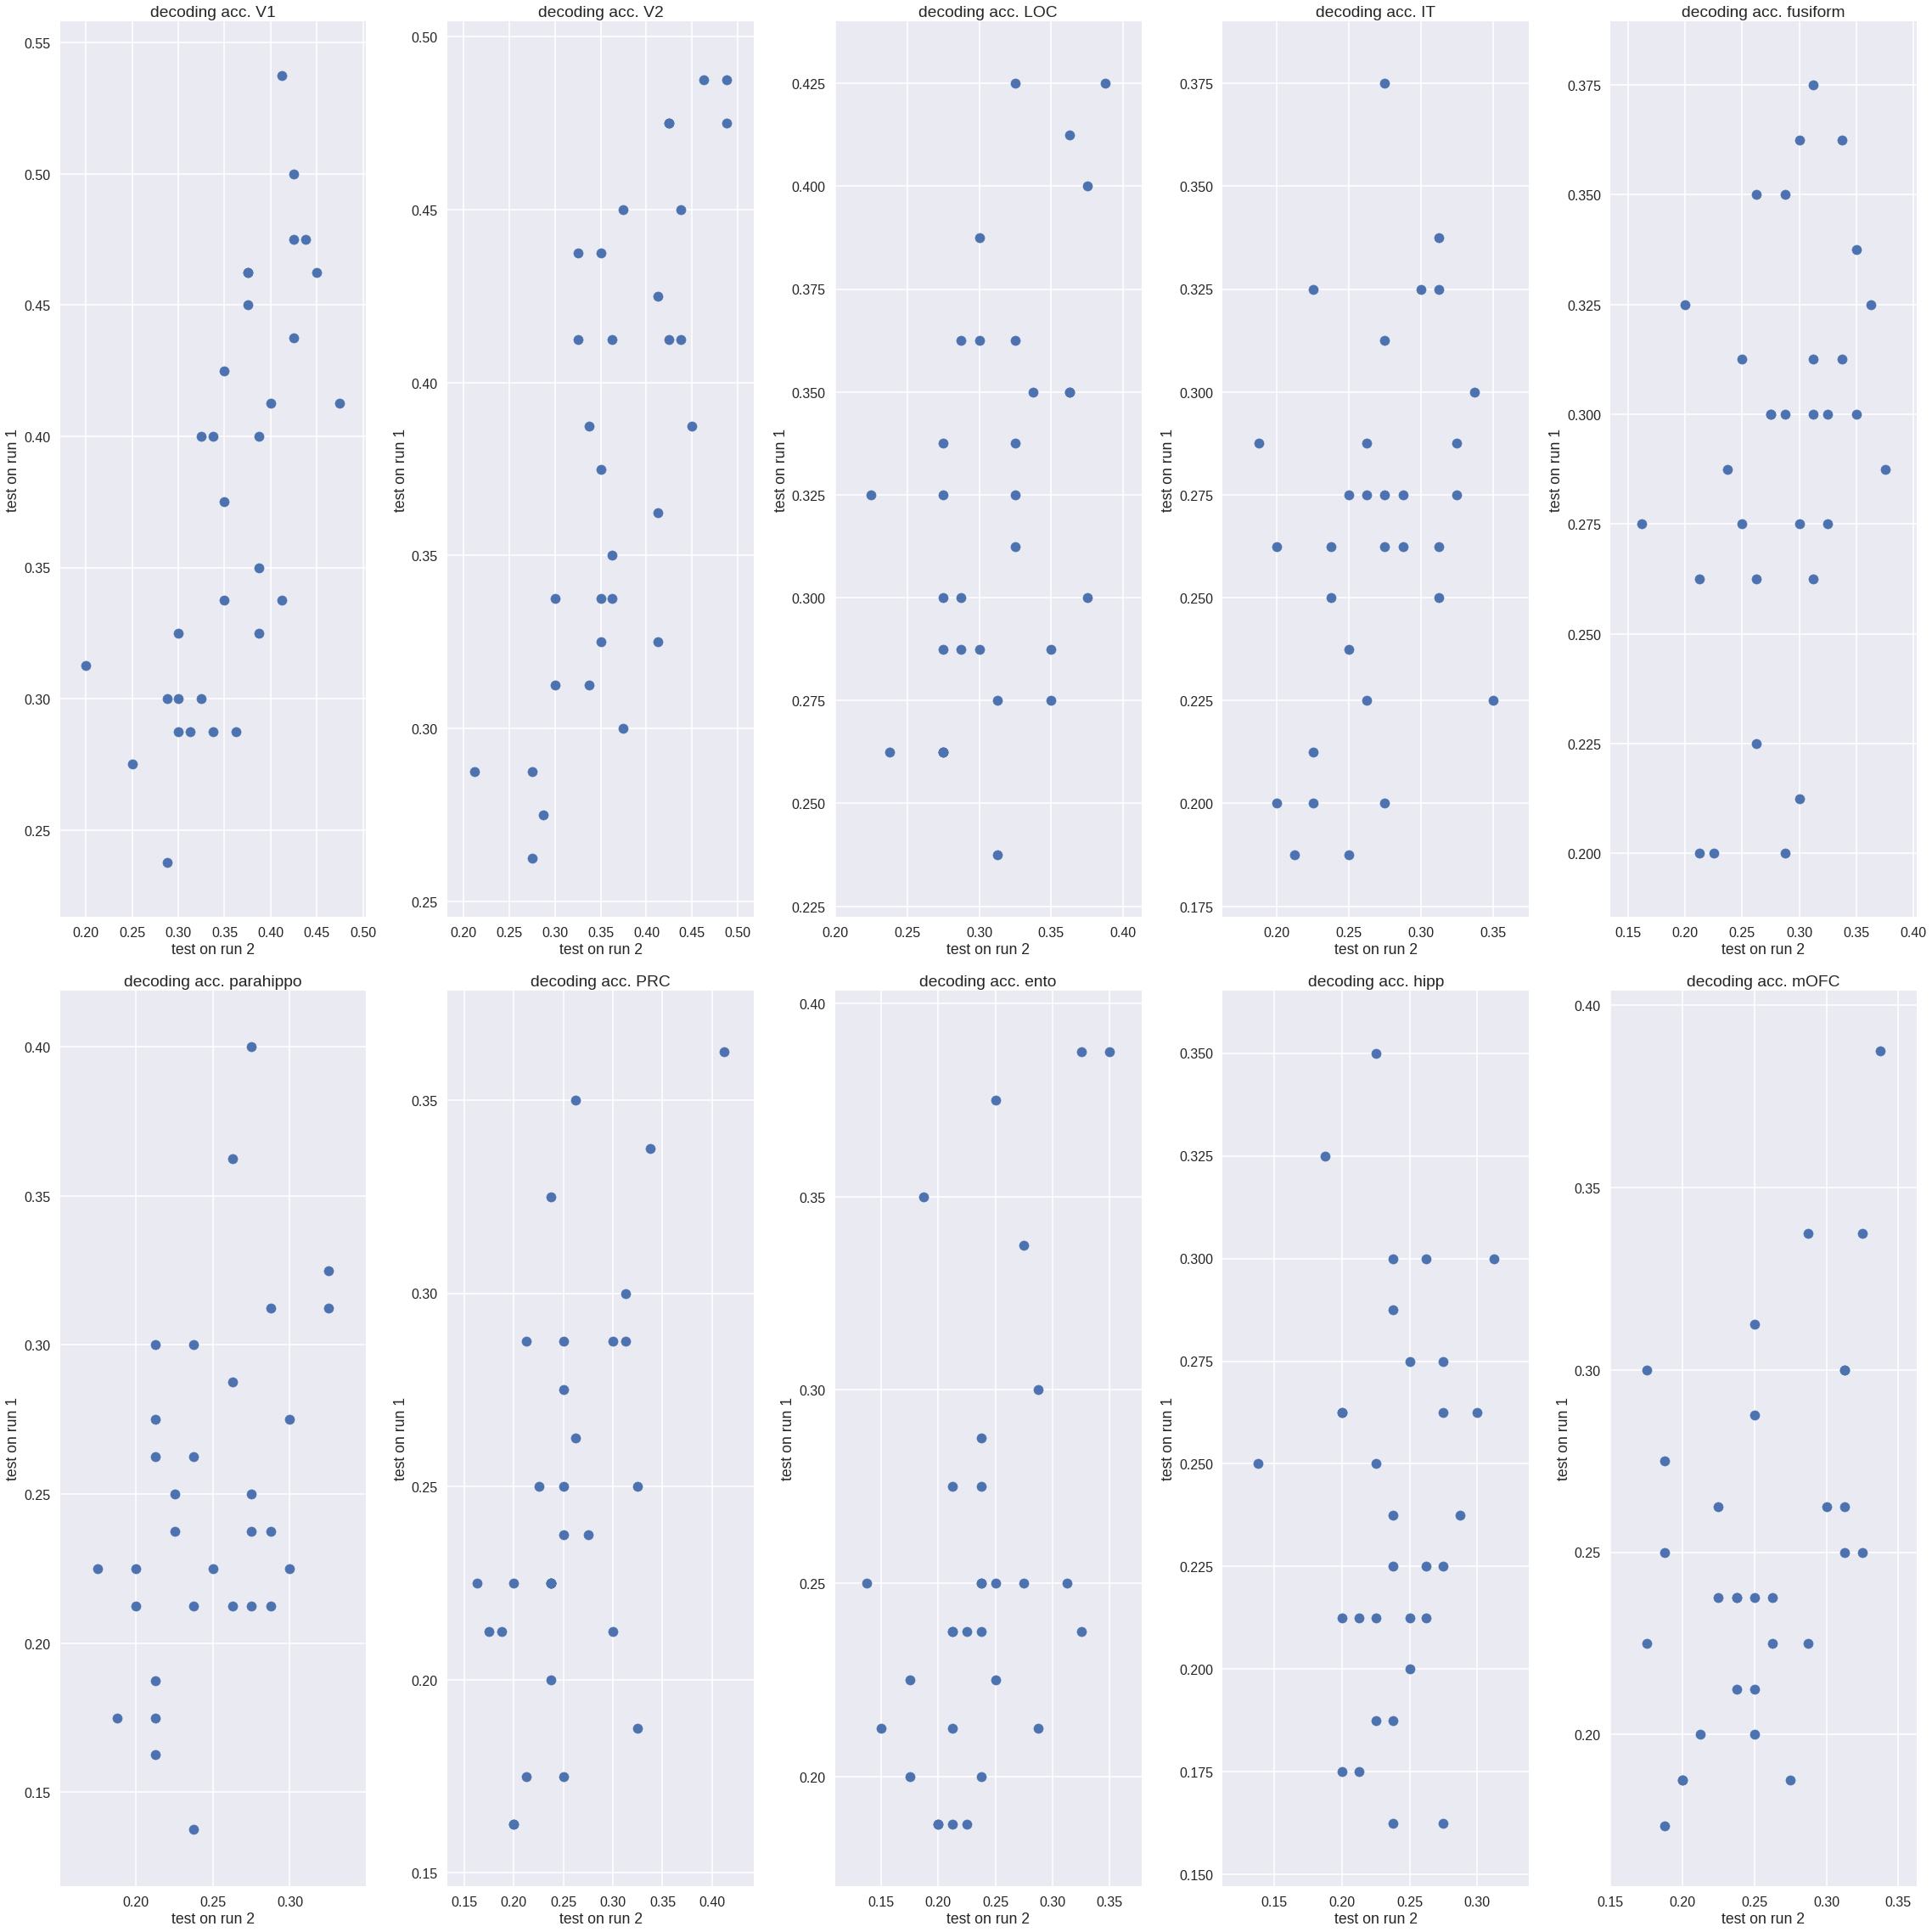

In [26]:
plt.figure(figsize=(32,32))
sns.set_context('poster')
for roi in roi_list:
    print(roi)
    roi_ind = np.where(roi_list==roi)[0][0]
    plt.subplot(2,5,roi_ind+1)
    plt.tight_layout()
    this_roi = SPLITS[:,roi_ind,:]
    plt.scatter(this_roi[:,0],this_roi[:,1])
    plt.xlabel('test on run 2')
    plt.ylabel('test on run 1')
    plt.title('decoding acc. {}'.format(roi))

In [57]:
len(phaseoutput)

3

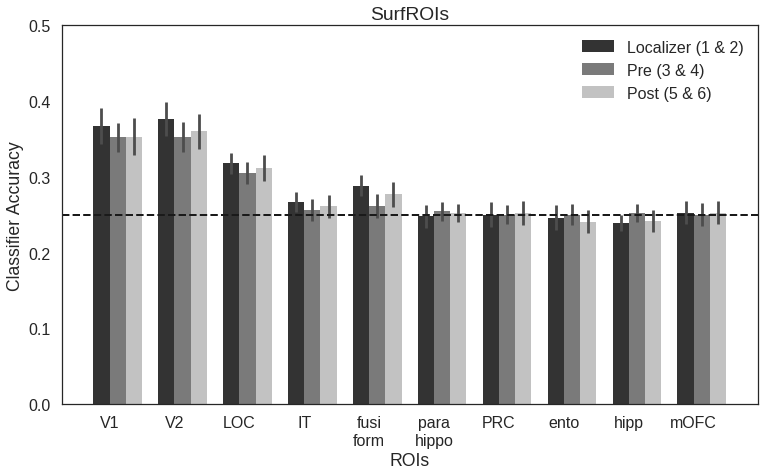

In [58]:
ROIs = ['V1','V2','LOC','IT','fusiform','parahippo', 'PRC', 'ento','hipp','mOFC']
ROIs_formatted = ['V1','V2','LOC','IT','fusi\nform','para\nhippo', 'PRC', 'ento','hipp','mOFC']
phases = ['Localizer (1 & 2)', 'Pre (3 & 4)', 'Post (5 & 6)']

sns.set_style('white')
sns.set_context('poster')

fig, ax = plt.subplots(figsize=(len(ROIs)+1,6+1))
bar_width = 0.25
opacity = 0.8
error_config = {'ecolor': '0.3'}
index = np.arange(len(ROIs))

for count, SPLITS in enumerate(phaseoutput):
    
    tcolor = (count * .35, count * .35, count * .35)
    
    sem = SPLITS.mean(2).std(0)/np.sqrt(len(sub_list))
    bar_height = sem * 2
    yvals = SPLITS.mean(2).mean(0)
    
    plt.bar(index + (bar_width * count), yvals, bar_width,
            alpha=opacity,
            color=tcolor,
            yerr=bar_height,
            error_kw=error_config, align='center',
            label=phases[count])

plt.xlabel('ROIs')
plt.ylabel('Classifier Accuracy')
plt.title('SurfROIs')
plt.xticks(index + bar_width / 2, ROIs_formatted)
plt.legend()
plt.ylim([0,0.5])
plt.tight_layout()
plt.axhline(y=0.25,linewidth=2, color=(0.1,0.1,0.1),linestyle='dashed')
plt.show()

# plt.xlim(0.5,1.5)
#plt.savefig('/home/jgunn/neurosketch/plots/object_decoding_accuracy_localizer_runs.pdf')